In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [3]:
import seaborn as sns

##### Initial data review 

In [2]:

loans_orig = pd.read_csv('C:/Users/rmbrm/Downloads/LoanStats_2015_v2/LoanStats_2015.csv', skiprows=1, low_memory=False) 


In [6]:
loans_orig.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000.0,12000.0,12000.0,60 months,9.80%,253.79,B,B3,Teacher,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,660xx,KS,23.84,0.0,Nov-2003,0.0,NaN,NaN,18.0,0.0,9786.0,13.4%,37.0,w,0.00,0.00,13842.626405,13842.63,12000.00,1842.63,0.0,0.0,0.0,Nov-2017,8529.37,NaN,Nov-2017,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,181540.0,2.0,...,4.0,NaN,14.0,NaN,0.0,2.0,4.0,5.0,10.0,13.0,11.0,22.0,4.0,18.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,291626.0,74787.0,49500.0,105910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000.0,25000.0,25000.0,36 months,5.32%,752.87,A,A1,Director,1 year,MORTGAGE,150000.0,Not Verified,Dec-2015,Current,n,NaN,NaN,credit_card,Credit card refinancing,054xx,VT,9.54,0.0,Feb-1996,0.0,NaN,NaN,7.0,0.0,19339.0,42.5%,18.0,w,6628.03,6628.03,20257.290000,20257.29,18371.97,1885.32,0.0,0.0,0.0,Mar-2018,752.87,Apr-2018,Aug-2017,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,430856.0,1.0,...,73.0,NaN,NaN,NaN,0.0,1.0,1.0,3.0,3.0,4.0,4.0,7.0,1.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,512381.0,44786.0,44000.0,51081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,28000.0,28000.0,28000.0,60 months,18.49%,718.51,D,D5,Engineer,10+ years,MORTGAGE,75000.0,Verified,Dec-2015,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,471xx,IN,31.88,0.0,Oct-2002,0.0,NaN,NaN,27.0,0.0,43413.0,51.9%,46.0,w,18904.38,18904.38,18609.350000,18609.35,9095.62,9513.73,0.0,0.0,0.0,Mar-2018,718.51,Apr-2018,Mar-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,193745.0,1.0,...,10.0,NaN,16.0,NaN,0.0,14.0,20.0,14.0,18.0,9.0,24.0,34.0,20.0,27.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,267312.0,57302.0,58500.0,31758.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,30000.0,30000.0,30000.0,36 months,15.77

In [7]:
loans_orig.shape

(421097, 145)

#### Below are visualizations of missing data on the unedited data set to see if any noteworthy patterns are evident. The first set is missing data matrices at different sampling rates. White areas indicate missing data.

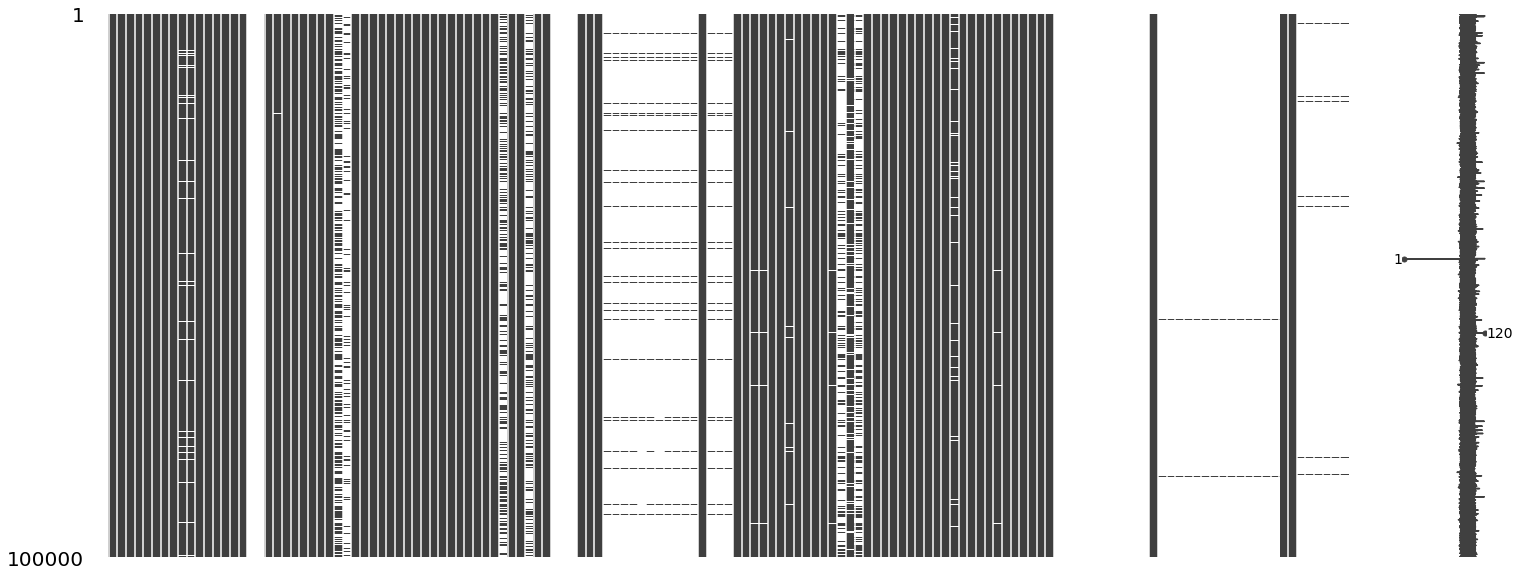

In [8]:
# 100,000
import missingno as msno
%matplotlib inline
msno.matrix(loans_orig.sample(100000))

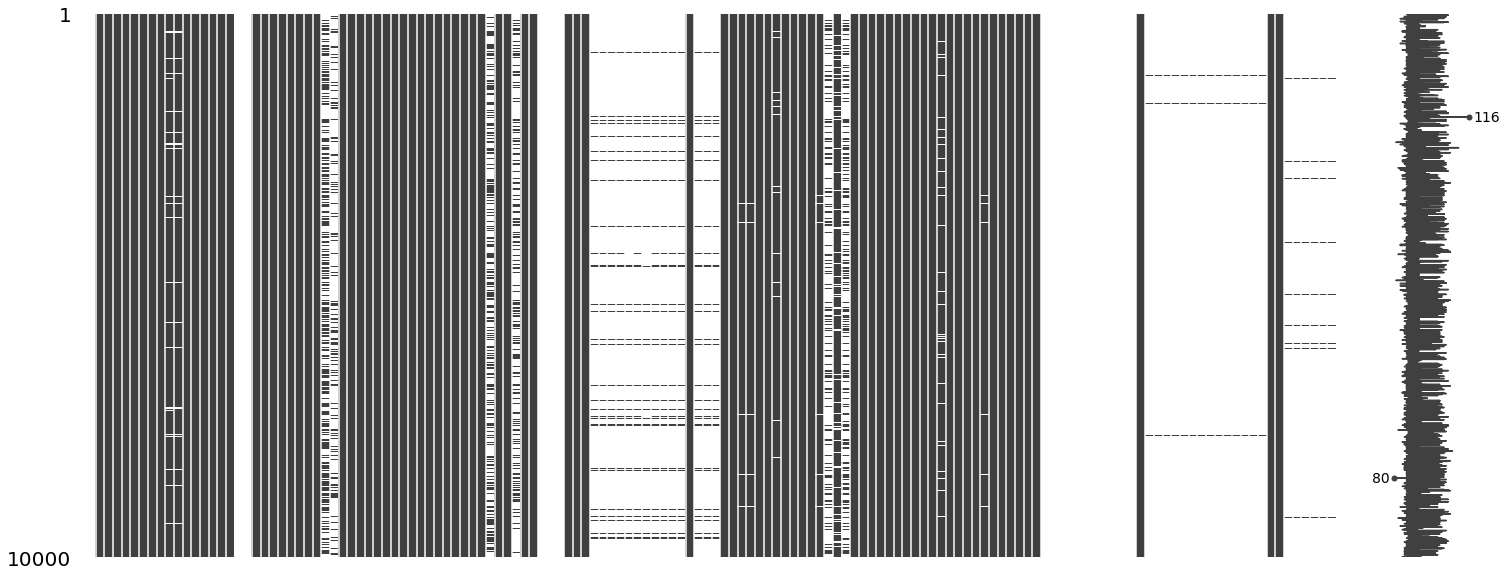

In [9]:
# 10,000
import missingno as msno
%matplotlib inline
msno.matrix(loans_orig.sample(10000))

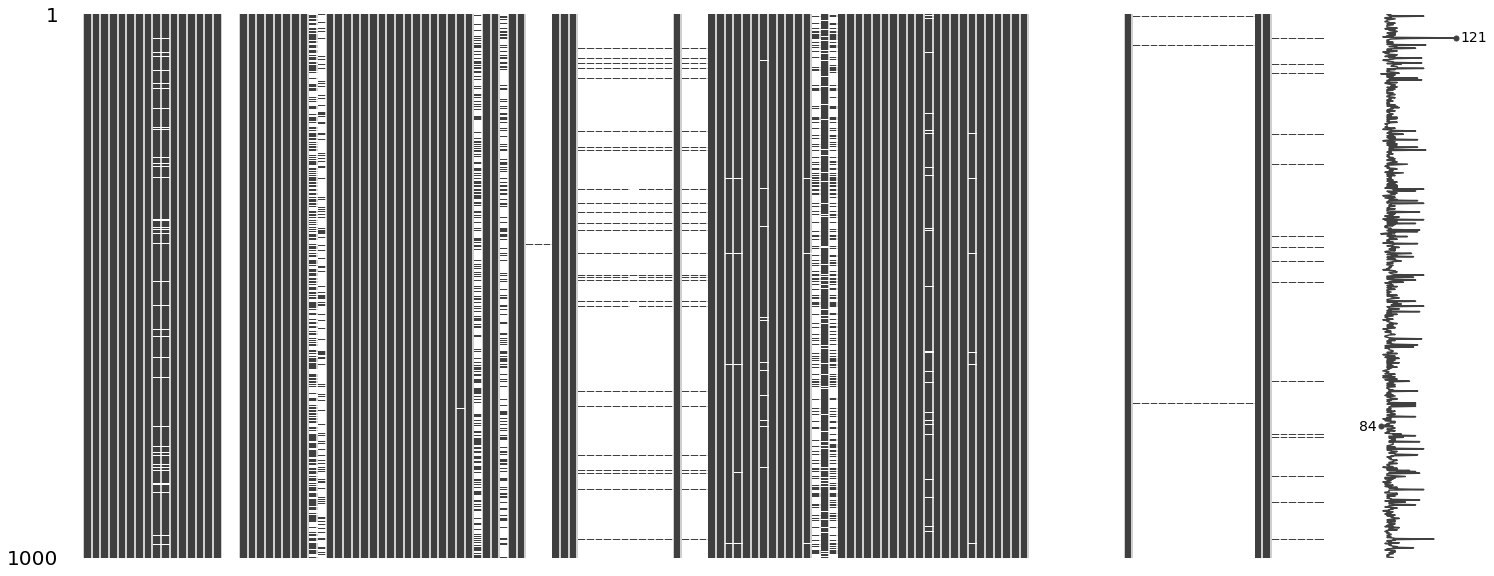

In [10]:
# 1,000
import missingno as msno
%matplotlib inline
msno.matrix(loans_orig.sample(1000))

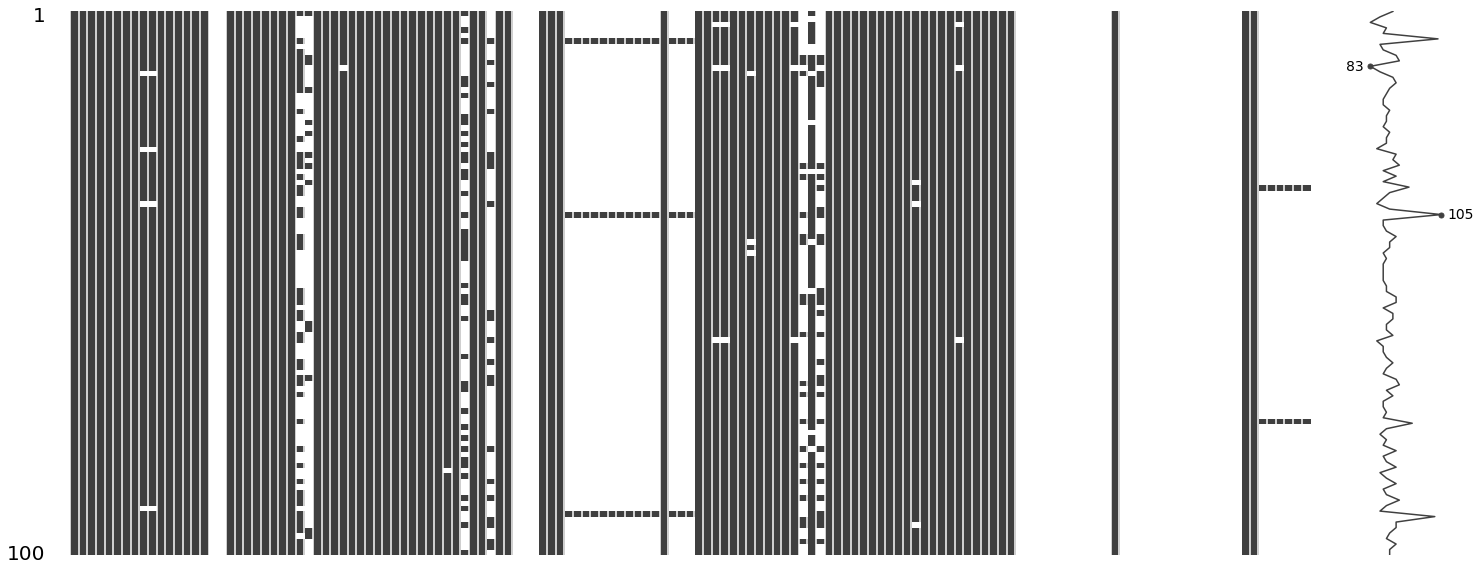

In [11]:
# 100
import missingno as msno
%matplotlib inline
msno.matrix(loans_orig.sample(100))

#### Below is initial removal of features for which 50% or more of the data is missing, followed by more review of missing data  

In [12]:
loans_orig.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,0.0,421093.000000,421095.000000,421095.000000,217133.000000,74415.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,122729.000000,421095.0,511.000000,509.000000,421095.000000,421095.000000,4.210950e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,4.210950e+05,21372.000000,21372.000000,21372.000000,421095.00000,421095.000000,417132.000000,416868.000000,421095.000000,421095.000000,408841.000000,421095.000000,421095.000000,421095.000000,421095.000000,417297.000000,108600.000000,376496.000000,151737.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421094.000000,421095.000000,421095.000000,401865.000000,421095.000000,421095.000000,421095.000000,421095.000000,416856.000000,421095.000000,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2114.0,2114.000000,2114.0,2114.000000,1736.000000,2114.000000,2114.000000,7398.000000,7398.000000,7398.000000
mean,NaN,15240.285862,15240.285862,15234.156426,441.849432,7.696561e+04,NaN,19.148367,0.347397,0.572690,34.023391,66.592609,11.948643,0.233776,1.768548e+04,25.493468,2327.938947,2326.858564,14143.351472,14137.897098,11175.695048,2807.992836,1.378155e+00,158.285431,28.159325,3924.709030,0.020240,43.809866,1.0,109981.011585,18.310118,0.006087,257.478241,1.400755e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.580491,1.389060,2.975482,5887.979740,60.881995,3.365771e+04,0.943945,1.537058,2.234091,4.66500,13104.784721,9636.063992,62.228136,0.010420,13.765184,127.567419,186.586697,13.451247,8.013204,1.685261,24.856534,39.838177,6.751163,35.797142,0.527054,3.740966,5.860832,4.799879,8.137138,8.649001,8.431786,14.883601,5.809238,11.894537,0.000761,0.004042,0.094318,2.170947,93.924313,47.527110,0.133188,0.064556,1.734070e+05,5.222199e+04,21958.208958,4.347865e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [13]:
loans_orig.isnull().sum()

id                                            421095
member_id                                     421097
loan_amnt                                          2
funded_amnt                                        2
funded_amnt_inv                                    2
term                                               2
int_rate                                           2
installment                                        2
grade                                              2
sub_grade                                          2
emp_title                                      23876
emp_length                                     23819
home_ownership                                     2
annual_inc                                         2
verification_status                                2
issue_d                                            2
loan_status                                        2
pymnt_plan                                         2
url                                           

In [29]:
half_count = len(loans_orig) / 2

In [39]:
loans_orig.shape

(421097, 145)

In [36]:
loans_abrdg = loans_orig.dropna(thresh=half_count,axis=1)

In [16]:
loans_abrdg.shape

(421097, 87)

In [17]:
loans_abrdg.isnull().sum()

loan_amnt                         2
funded_amnt                       2
funded_amnt_inv                   2
term                              2
int_rate                          2
installment                       2
grade                             2
sub_grade                         2
emp_title                     23876
emp_length                    23819
home_ownership                    2
annual_inc                        2
verification_status               2
issue_d                           2
loan_status                       2
pymnt_plan                        2
purpose                           2
title                           134
zip_code                          2
addr_state                        2
dti                               4
delinq_2yrs                       2
earliest_cr_line                  2
inq_last_6mths                    2
open_acc                          2
pub_rec                           2
revol_bal                         2
revol_util                  

In [3]:
# write a pickle of features and main target

loans_abrdg.to_pickle ("C:/Users/rmbrm/Documents/DS_WP/Happy Money Assessment/data_edited", compression='infer', protocol=4)

In [18]:
df = loans_abrdg

In [18]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,12000.0,12000.0,12000.0,60 months,9.80%,253.79,B,B3,Teacher,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,660xx,KS,23.84,0.0,Nov-2003,0.0,18.0,0.0,9786.0,13.4%,37.0,w,0.00,0.00,13842.626405,13842.63,12000.00,1842.63,0.0,0.0,0.0,Nov-2017,8529.37,Nov-2017,0.0,1.0,Individual,0.0,0.0,181540.0,73200.0,8.0,10086.0,41055.0,17.1,0.0,0.0,127.0,145.0,4.0,1.0,2.0,4.0,14.0,0.0,2.0,4.0,5.0,10.0,13.0,11.0,22.0,4.0,18.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,291626.0,74787.0,49500.0,105910.0,N,Cash,N
1,25000.0,25000.0,25000.0,36 months,5.32%,752.87,A,A1,Director,1 year,MORTGAGE,150000.0,Not Verified,Dec-2015,Current,n,credit_card,Credit card refinancing,054xx,VT,9.54,0.0,Feb-1996,0.0,7.0,0.0,19339.0,42.5%,18.0,w,6628.03,6628.03,20257.290000,20257.29,18371.97,1885.32,0.0,0.0,0.0,Mar-2018,752.87,Aug-2017,0.0,1.0,Individual,0.0,0.0,430856.0,45500.0,1.0,61551.0,24661.0,44.0,0.0,0.0,166.0,238.0,4.0,4.0,7.0,73.0,NaN,0.0,1.0,1.0,3.0,3.0,4.0,4.0,7.0,1.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,512381.0,44786.0,44000.0,51081.0,N,Cash,N
2,28000.0,28000.0,28000.0,60 months,18.49%,718.51,D,D5,Engineer,10+ years,MORTGAGE,75000.0,Verified,Dec-2015,Current,n,debt_consolidation,Debt consolidation,471xx,IN,31.88,0.0,Oct-2002,0.0,27.0,0.0,43413.0,51.9%,46.0,w,18904.38,18904.38,18609.350000,18609.35,9095.62,9513.73,0.0,0.0,0.0,Mar-2018,718.51,Mar-2018,0.0,1.0,Individual,0.0,0.0,193745.0,83600.0,8.0,7176.0,23476.0,59.9,0.0,0.0,143.0,158.0,4.0,4.0,2.0,10.0,16.0,0.0,14.0,20.0,14.0,18.0,9.0,24.0,34.0,20.0,27.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,267312.0,57302.0,58500.0,31758.0,N,Cash,N
3,30000.0,30000.0,30000.0,36 months,15.77%,1051.31,D,D1,Vice-President,2 years,MORTGAGE,175000.0,Not Verified,Dec-2015,Fully Paid,n,home_improvement,Home improvement,430xx,OH,18.50,0.0,Aug-1997,1.0,9.0,0.0,21831.0,50.3%,23.0,w,0.00,0.00,33903.765739,33903.77,30000.00,3903.77,0.0,0.0,0.0,Dec-2016,23456.38,Sep-2017,0.0,1.0,Individual,0.0,0.0,408118.0,43400.0,7.0,51015.0,21569.0,50.3,0.0,0.0,118.0,220.0,16.0,6.0,3.0,16.0,0.0,0.0,2.0,2.0,3.0,7.0,9.0,4.0,11.0,2.0,9.0,0.0,0.0,0.0,3.0,95.7,33.3,0.0,0.0,447599.0,152571.0,43400.0,146568.0,N,Cash,N
4,17600.0,17600.0,17600.0,60 months,19.89%,465.22,E,E3,RN,< 1 year,RENT,44000.0,Verified,Dec-2015,Current,n,credit_card,NaN,322xx,FL,17.56,0.0,Jun-2006,0.0,7.0,0.0,12900.0,102.4%,25.0,w,12017.72,12017.72,12047.100000,12047.10,5582.28,6464.82,0.0,0.0,0.0,Mar-2018,465.22,Mar-2018,0.0,1.0,Individual,0.0,0.0,133285.0,12600.0,1.0,19041.0,0.0,102.4,0.0,0.0,112.0,114.0,25.0,13.0,0.0,25.0,NaN,0.0,3.0,3.0,3.0,3.0,21.0,3.0,4.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,139633.0,133285.0,12600.0,127033.0,N,Cash,N


In [14]:
df.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
421092,12000.0,12000.0,12000.0,60 months,19.99%,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,Charged Off,n,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,17.0,0.0,8254.0,30.6%,20.0,w,0.0,0.0,5366.990000,5366.99,1552.69,2234.98,0.0,1579.32,284.2776,Jan-2016,317.86,Oct-2016,1.0,1.0,Individual,0.0,0.0,58418.0,27000.0,6.0,3895.0,3752.0,61.3,0.0,0.0,56.0,83.0,5.0,5.0,0.0,12.0,0.0,1.0,5.0,7.0,7.0,7.0,3.0,15.0,16.0,7.0,17.0,0.0,0.0,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0,N,Cash,N
421093,13000.0,13000.0,13000.0,60 months,15.99%,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,Charged Off,n,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,9.0,1.0,11031.0,61.3%,22.0,w,0.0,0.0,6109.520000,6109.52,2527.70,2506.32,0.0,1075.50,193.5900,May-2016,316.07,Dec-2016,0.0,1.0,Individual,0.0,0.0,34178.0,18000.0,7.0,3798.0,2554.0,75.9,0.0,0.0,134.0,108.0,6.0,6.0,0.0,17.0,10.0,0.0,4.0,6.0,4.0,4.0,12.0,7.0,10.0,6.0,9.0,0.0,0.0,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0,N,Cash,N
421094,20000.0,20000.0,20000.0,36 months,11.99%,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,Jan-2015,Fully Paid,n,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,8.0,1.0,33266.0,79.8%,10.0,f,0.0,0.0,23735.386335,23735.39,20000.00,3735.39,0.0,0.00,0.0000,May-2017,5776.74,Jan-2018,0.0,1.0,Individual,0.0,0.0,33307.0,41700.0,1.0,4163.0,8434.0,79.8,0.0,0.0,146.0,155.0,5.0,5.0,0.0,5.0,0.0,0.0,5.0,5.0,6.0,7.0,1.0,6.0,7.0,5.0,8.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0,N,Cash,N
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
dfa = df.drop(df.index[421095])

In [23]:
dfb = dfa.drop(dfa.index[421095])

In [24]:
dfb.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
421090,24000.0,24000.0,24000.0,36 months,11.99%,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,Fully Paid,n,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,5.0,0.0,8621.0,84.5%,23.0,f,0.0,0.0,28663.686660,28663.69,24000.00,4663.69,0.0,0.00,0.0000,Feb-2018,2.58,Jan-2018,0.0,1.0,Individual,0.0,0.0,140285.0,10200.0,3.0,35071.0,976.0,89.2,0.0,0.0,NaN,488.0,3.0,3.0,4.0,3.0,3.0,10.0,2.0,3.0,3.0,14.0,0.0,4.0,17.0,3.0,5.0,0.0,0.0,0.0,2.0,56.5,100.0,0.0,0.0,152650.0,8621.0,9000.0,0.0,N,Cash,N
421091,10000.0,10000.0,10000.0,36 months,11.99%,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,Fully Paid,n,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,9.0,1.0,14037.0,82.1%,15.0,f,0.0,0.0,11947.244045,11947.24,10000.00,1947.24,0.0,0.00,0.0000,Jan-2018,331.90,Jan-2018,0.0,1.0,Individual,0.0,0.0,25274.0,17100.0,2.0,3159.0,448.0,95.1,0.0,0.0,122.0,115.0,17.0,10.0,0.0,90.0,9.0,0.0,3.0,6.0,3.0,4.0,7.0,7.0,8.0,6.0,9.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,32950.0,25274.0,9200.0,15850.0,N,Cash,N
421092,12000.0,12000.0,12000.0,60 months,19.99%,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,Charged Off,n,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,17.0,0.0,8254.0,30.6%,20.0,w,0.0,0.0,5366.990000,5366.99,1552.69,2234.98,0.0,1579.32,284.2776,Jan-2016,317.86,Oct-2016,1.0,1.0,Individual,0.0,0.0,58418.0,27000.0,6.0,3895.0,3752.0,61.3,0.0,0.0,56.0,83.0,5.0,5.0,0.0,12.0,0.0,1.0,5.0,7.0,7.0,7.0,3.0,15.0,16.0,7.0,17.0,0.0,0.0,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0,N,Cash,N
421093,13000.0,13000.0,13000.0,60 months,15.99%,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,Charged Off,n,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,9.0,1.0,11031.0,61.3%,22.0,w,0.0,0.0,6109.520000,6109.52,2527.70,2506.32,0.0,1075.50,193.5900,May-2016,316.07,Dec-2016,0.0,1.0,Individual,0.0,0.0,34178.0,18000.0,7.0,3798.0,2554.0,75.9,0.0,0.0,134.0,108.0,6.0,6.0,0.0,17.0,10.0,0.0,4.0,6.0,4.0,4.0,12.0,7.0,10.0,6.0,9.0,0.0,0.0,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0,N,Cash,N
421094,20000.0,20000.0,20000.0,36 months,11.99%,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,Jan-2015,Fully Paid,n,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,8.0,1.0,33266.0,79.8%,10.0,f,0.0,0.0,23735.386335,23735.39,20000.00,3735.39,0.0,0.00,0.0000,May-2017,5776.74,Jan-2018,0.0,1.0,Individual,0.0,0.0,33307.0,41700.0,1.0,4163.0,8434.0,79.8,0.0,0.0,146.0,155.0,5.0,5.0,0.0,5.0,0.0,0.0,5.0,5.0,6.0,7.0,1.0,6.0,7.0,5.0,8.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0,N,Cash,N


In [25]:
# write a pickle of features and main target

dfb.to_pickle ("C:/Users/rmbrm/Documents/DS_WP/Happy Money Assessment/data_edited", compression='infer', protocol=4)

In [26]:
df = dfb

#### Below is reading in data dictionary 

In [19]:
data_dictionary = pd.read_excel('C:/Users/rmbrm/Documents/DS_WP/Happy Money Assessment/LCDataDictionary.xlsx') # Loading in the data dictionary
print(data_dictionary.shape[0])
print(data_dictionary.columns.tolist())

153
['LoanStatNew', 'Description']


In [20]:
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name',
                                                 'Description': 'description'})

In [21]:
data_dictionary.head()

,name,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [22]:
df_dtypes = pd.DataFrame(df.dtypes,columns=['dtypes'])
df_dtypes = df_dtypes.reset_index()
df_dtypes['name'] = df_dtypes['index']
df_dtypes = df_dtypes[['name','dtypes']]

df_dtypes['first value'] = df.loc[0].values
preview = df_dtypes.merge(data_dictionary, on='name',how='left')

In [32]:
preview.head()

,name,dtypes,first value,description
0,loan_amnt,float64,12000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,funded_amnt,float64,12000,The total amount committed to that loan at that point in time.
2,funded_amnt_inv,float64,12000,The total amount committed by investors for that loan at that point in time.
3,term,object,60 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
4,int_rate,object,9.80%,Interest Rate on the loan


In [ ]:
preview.to_csv('C:/Users/rmbrm/Documents/DS_WP/Happy Money Assessment/variables.csv')

###### Reviewing features, some may be redundant, such as those relating to loan amount. Below demonstrates that 90% of the cases the first three variables relating to loan amount are the same. Therefore two duplicate variables can be deleted. Code after that is just data exploration

In [15]:
import numpy as np

In [36]:
df['loan'] = np.where((df['loan_amnt'] == df['funded_amnt']) & (df['loan_amnt'] == df['funded_amnt_inv']), df['loan_amnt'], np.nan)

In [37]:
df.isnull().sum()

loan_amnt                         2
funded_amnt                       2
funded_amnt_inv                   2
term                              2
int_rate                          2
installment                       2
grade                             2
sub_grade                         2
emp_title                     23876
emp_length                    23819
home_ownership                    2
annual_inc                        2
verification_status               2
issue_d                           2
loan_status                       2
pymnt_plan                        2
purpose                           2
title                           134
zip_code                          2
addr_state                        2
dti                               4
delinq_2yrs                       2
earliest_cr_line                  2
inq_last_6mths                    2
open_acc                          2
pub_rec                           2
revol_bal                         2
revol_util                  

In [38]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan
0,12000.0,12000.0,12000.0,60 months,9.80%,253.79,B,B3,Teacher,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,660xx,KS,23.84,0.0,Nov-2003,0.0,18.0,0.0,9786.0,13.4%,37.0,w,0.00,0.00,13842.626405,13842.63,12000.00,1842.63,0.0,0.0,0.0,Nov-2017,8529.37,Nov-2017,0.0,1.0,Individual,0.0,0.0,181540.0,73200.0,8.0,10086.0,41055.0,17.1,0.0,0.0,127.0,145.0,4.0,1.0,2.0,4.0,14.0,0.0,2.0,4.0,5.0,10.0,13.0,11.0,22.0,4.0,18.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,291626.0,74787.0,49500.0,105910.0,N,Cash,N,12000.0
1,25000.0,25000.0,25000.0,36 months,5.32%,752.87,A,A1,Director,1 year,MORTGAGE,150000.0,Not Verified,Dec-2015,Current,n,credit_card,Credit card refinancing,054xx,VT,9.54,0.0,Feb-1996,0.0,7.0,0.0,19339.0,42.5%,18.0,w,6628.03,6628.03,20257.290000,20257.29,18371.97,1885.32,0.0,0.0,0.0,Mar-2018,752.87,Aug-2017,0.0,1.0,Individual,0.0,0.0,430856.0,45500.0,1.0,61551.0,24661.0,44.0,0.0,0.0,166.0,238.0,4.0,4.0,7.0,73.0,NaN,0.0,1.0,1.0,3.0,3.0,4.0,4.0,7.0,1.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,512381.0,44786.0,44000.0,51081.0,N,Cash,N,25000.0
2,28000.0,28000.0,28000.0,60 months,18.49%,718.51,D,D5,Engineer,10+ years,MORTGAGE,75000.0,Verified,Dec-2015,Current,n,debt_consolidation,Debt consolidation,471xx,IN,31.88,0.0,Oct-2002,0.0,27.0,0.0,43413.0,51.9%,46.0,w,18904.38,18904.38,18609.350000,18609.35,9095.62,9513.73,0.0,0.0,0.0,Mar-2018,718.51,Mar-2018,0.0,1.0,Individual,0.0,0.0,193745.0,83600.0,8.0,7176.0,23476.0,59.9,0.0,0.0,143.0,158.0,4.0,4.0,2.0,10.0,16.0,0.0,14.0,20.0,14.0,18.0,9.0,24.0,34.0,20.0,27.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,267312.0,57302.0,58500.0,31758.0,N,Cash,N,28000.0
3,30000.0,30000.0,30000.0,36 months,15.77%,1051.31,D,D1,Vice-President,2 years,MORTGAGE,175000.0,Not Verified,Dec-2015,Fully Paid,n,home_improvement,Home improvement,430xx,OH,18.50,0.0,Aug-1997,1.0,9.0,0.0,21831.0,50.3%,23.0,w,0.00,0.00,33903.765739,33903.77,30000.00,3903.77,0.0,0.0,0.0,Dec-2016,23456.38,Sep-2017,0.0,1.0,Individual,0.0,0.0,408118.0,43400.0,7.0,51015.0,21569.0,50.3,0.0,0.0,118.0,220.0,16.0,6.0,3.0,16.0,0.0,0.0,2.0,2.0,3.0,7.0,9.0,4.0,11.0,2.0,9.0,0.0,0.0,0.0,3.0,95.7,33.3,0.0,0.0,447599.0,152571.0,43400.0,146568.0,N,Cash,N,30000.0
4,17600.0,17600.0,17600.0,60 months,19.89%,465.22,E,E3,RN,< 1 year,RENT,44000.0,Verified,Dec-2015,Current,n,credit_card,NaN,322xx,FL,17.56,0.0,Jun-2006,0.0,7.0,0.0,12900.0,102.4%,25.0,w,12017.72,12017.72,12047.100000,12047.10,5582.28,6464.82,0.0,0.0,0.0,Mar-2018,465.22,Mar-2018,0.0,1.0,Individual,0.0,0.0,133285.0,12600.0,1.0,19041.0,0.0,102.4,0.0,0.0,112.0,114.0,25.0,13.0,0.0,25.0,NaN,0.0,3.0,3.0,3.0,3.0,21.0,3.0,4.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,139633.0,133285.0,12600.0,127033.0,N,Cash,N,17600.0


In [45]:
df['sub_grade'].value_counts()

C1    26434
C2    25496
B4    25121
C3    24844
C4    24752
B3    24637
B5    23581
A5    23059
B2    22171
B1    22096
C5    19041
D1    16977
A4    15486
D2    12757
A1    12373
D3    11638
A2    11529
D4    11459
A3    10889
D5     9823
E1     9235
E2     8335
E3     7158
E4     5732
E5     4488
F1     3278
F2     2391
F3     1725
F4     1342
F5     1081
G1      762
G2      575
G3      398
G4      241
G5      191
Name: sub_grade, dtype: int64

In [44]:
df['grade'].value_counts()

C    120567
B    117606
A     73336
D     62654
E     34948
F      9817
G      2167
Name: grade, dtype: int64

###### I think grade can be deleted. CHANGED MY MIND LATER

In [48]:
df['home_ownership'].value_counts()

MORTGAGE    207683
RENT        167644
OWN          45766
ANY              2
Name: home_ownership, dtype: int64

In [49]:
df['verification_status'].value_counts()

Source Verified    179565
Verified           123016
Not Verified       118514
Name: verification_status, dtype: int64

#### Create a list of value counts of all variables for reference.

In [51]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- loan_amnt ---
10000.0    28814
12000.0    24664
20000.0    24173
15000.0    23724
35000.0    19772
5000.0     13288
8000.0     13003
25000.0    12675
6000.0     12222
24000.0    12201
16000.0    11639
18000.0    10520
30000.0     9411
28000.0     8176
7000.0      6485
14000.0     6407
21000.0     6103
9000.0      5005
4000.0      4462
3000.0      4281
11000.0     3631
13000.0     3468
9600.0      3206
14400.0     3079
7200.0      2865
17000.0     2802
22000.0     2516
7500.0      2386
11200.0     2345
2000.0      2252
           ...  
34850.0        6
33125.0        5
33650.0        5
1625.0         5
32850.0        5
31875.0        5
30075.0        5
32075.0        5
31925.0        5
34150.0        5
34375.0        5
32275.0        4
32825.0        4
31125.0        4
34325.0        4
32925.0        4
29075.0        4
32525.0        4
1575.0         4
30050.0        4
34600.0        4
32700.0        4
33775.0        4
34175.0        4
1025.0         4
32575.0        3
34275.0     

In [13]:
df = pd.read_pickle ("C:/Users/rmbrm/Documents/DS_WP/Happy Money Assessment/data_edited")

#### Question A

In [11]:

((df.groupby('issue_d')['loan_amnt'].mean()))


issue_d
Apr-2015    15225.705676
Aug-2015    15474.875996
Dec-2015    15062.367228
Feb-2015    15435.781447
Jan-2015    15185.933717
Jul-2015    15148.135416
Jun-2015    15087.841847
Mar-2015    15354.459646
May-2015    15140.835240
Nov-2015    15114.503730
Oct-2015    15180.057988
Sep-2015    15720.358926
Name: loan_amnt, dtype: float64

In [7]:
# A1
mean = ((df.groupby('issue_d')['loan_amnt'].mean()))
# df.groupby(['cluster','org']).mean() 

In [9]:
# A1
mean.mean()

15260.90473809072

In [14]:
((df.groupby('issue_d')['loan_amnt'].sum())).mean()

534800681.25

In [41]:
# A2
df.groupby('grade')['default'].count()

grade
A     73336
B    117606
C    120567
D     62654
E     34948
F      9817
G      2167
Name: default, dtype: int64

In [42]:

df.groupby('grade')['default'].sum() / df.groupby('grade')['default'].count()

grade
A    0.045053
B    0.097529
C    0.162217
D    0.235165
E    0.290832
F    0.375980
G    0.430549
Name: default, dtype: float64

In [ ]:
# A3 using dataframe created later, using this equation: Gross revenue = Loan amount x (term/12 x interest rate)

In [13]:
df = pd.read_pickle ("C:/Users/rmbrm/Documents/DS_WP/Happy Money Assessment/data_")

In [15]:
df["loan_amnt"] = df.loan_amnt.astype(float)

In [20]:
df["term"] = df.term.astype(float)

In [24]:
df["int_rate"] = df.int_rate.astype(float)

In [16]:
cols = ['term']

# pass them to df.replace(), specifying each char and it's replacement:
df[cols] = df[cols].replace({' months': ''}, regex=True)

In [23]:
cols = ['int_rate']

# pass them to df.replace(), specifying each char and it's replacement:
df[cols] = df[cols].replace({'%': ''}, regex=True)

In [32]:


df['Gross_rev'] = df['loan_amnt'] * (.01 * (df['term'] / 12) * df['int_rate']) 

In [33]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,last_pymnt_d,collections_12_mths_ex_med,acc_now_delinq,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,default,Gross_rev,Gross_rev2
0,12000.0,60.0,9.80,253.79,B,10+ years,MORTGAGE,65000.0,Not Verified,debt_consolidation,KS,23.84,0.0,0.0,18.0,0.0,13.4%,Nov-2017,0.0,0.0,41055.0,17.1,0.0,127.0,145.0,4.0,1.0,4.0,14.0,0.0,2.0,5.0,18.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,49500.0,105910.0,N,N,0,5880.0,5880.0
1,25000.0,36.0,5.32,752.87,A,1 year,MORTGAGE,150000.0,Not Verified,credit_card,VT,9.54,0.0,0.0,7.0,0.0,42.5%,Mar-2018,0.0,0.0,24661.0,44.0,0.0,166.0,238.0,4.0,4.0,73.0,NaN,0.0,1.0,3.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,44000.0,51081.0,N,N,0,3990.0,3990.0
2,28000.0,60.0,18.49,718.51,D,10+ years,MORTGAGE,75000.0,Verified,debt_consolidation,IN,31.88,0.0,0.0,27.0,0.0,51.9%,Mar-2018,0.0,0.0,23476.0,59.9,0.0,143.0,158.0,4.0,4.0,10.0,16.0,0.0,14.0,14.0,27.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,58500.0,31758.0,N,N,0,25886.0,25886.0
3,30000.0,36.0,15.77,1051.31,D,2 years,MORTGAGE,175000.0,Not Verified,home_improvement,OH,18.50,0.0,1.0,9.0,0.0,50.3%,Dec-2016,0.0,0.0,21569.0,50.3,0.0,118.0,220.0,16.0,6.0,16.0,0.0,0.0,2.0,3.0,9.0,0.0,0.0,0.0,3.0,95.7,33.3,0.0,0.0,43400.0,146568.0,N,N,0,14193.0,14193.0
4,17600.0,60.0,19.89,465.22,E,< 1 year,RENT,44000.0,Verified,credit_card,FL,17.56,0.0,0.0,7.0,0.0,102.4%,Mar-2018,0.0,0.0,0.0,102.4,0.0,112.0,114.0,25.0,13.0,25.0,NaN,0.0,3.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,12600.0,127033.0,N,N,0,17503.2,17503.2


In [28]:
df['default'].value_counts()

0    357241
1     63854
Name: default, dtype: int64

In [ ]:
profit = df

In [35]:
df.groupby('default')['Gross_rev'].sum()

default
0    2.700119e+09
1    6.500872e+08
Name: Gross_rev, dtype: float64

In [ ]:
"C:/Users/rmbrm/Documents/DS_WP/Happy Money Assessment/",

#### Code target

In [29]:
 

df['default'] = df['loan_status']

In [28]:
recode = {'Fully Paid': 0, 'Current': 0, 'Charged Off': 1, 'Late (31-120 days)': 0, 'In Grace Period': 0, 'Late (16-30 days)': 0, 'Default': 1}

In [30]:
df['default'] = df['default'].apply(lambda x: recode[x])

In [32]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,default
0,12000.0,12000.0,12000.0,60 months,9.80%,253.79,B,B3,Teacher,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,660xx,KS,23.84,0.0,Nov-2003,0.0,18.0,0.0,9786.0,13.4%,37.0,w,0.00,0.00,13842.626405,13842.63,12000.00,1842.63,0.0,0.0,0.0,Nov-2017,8529.37,Nov-2017,0.0,1.0,Individual,0.0,0.0,181540.0,73200.0,8.0,10086.0,41055.0,17.1,0.0,0.0,127.0,145.0,4.0,1.0,2.0,4.0,14.0,0.0,2.0,4.0,5.0,10.0,13.0,11.0,22.0,4.0,18.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,291626.0,74787.0,49500.0,105910.0,N,Cash,N,0
1,25000.0,25000.0,25000.0,36 months,5.32%,752.87,A,A1,Director,1 year,MORTGAGE,150000.0,Not Verified,Dec-2015,Current,n,credit_card,Credit card refinancing,054xx,VT,9.54,0.0,Feb-1996,0.0,7.0,0.0,19339.0,42.5%,18.0,w,6628.03,6628.03,20257.290000,20257.29,18371.97,1885.32,0.0,0.0,0.0,Mar-2018,752.87,Aug-2017,0.0,1.0,Individual,0.0,0.0,430856.0,45500.0,1.0,61551.0,24661.0,44.0,0.0,0.0,166.0,238.0,4.0,4.0,7.0,73.0,NaN,0.0,1.0,1.0,3.0,3.0,4.0,4.0,7.0,1.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,512381.0,44786.0,44000.0,51081.0,N,Cash,N,0
2,28000.0,28000.0,28000.0,60 months,18.49%,718.51,D,D5,Engineer,10+ years,MORTGAGE,75000.0,Verified,Dec-2015,Current,n,debt_consolidation,Debt consolidation,471xx,IN,31.88,0.0,Oct-2002,0.0,27.0,0.0,43413.0,51.9%,46.0,w,18904.38,18904.38,18609.350000,18609.35,9095.62,9513.73,0.0,0.0,0.0,Mar-2018,718.51,Mar-2018,0.0,1.0,Individual,0.0,0.0,193745.0,83600.0,8.0,7176.0,23476.0,59.9,0.0,0.0,143.0,158.0,4.0,4.0,2.0,10.0,16.0,0.0,14.0,20.0,14.0,18.0,9.0,24.0,34.0,20.0,27.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,267312.0,57302.0,58500.0,31758.0,N,Cash,N,0
3,30000.0,30000.0,30000.0,36 months,15.77%,1051.31,D,D1,Vice-President,2 years,MORTGAGE,175000.0,Not Verified,Dec-2015,Fully Paid,n,home_improvement,Home improvement,430xx,OH,18.50,0.0,Aug-1997,1.0,9.0,0.0,21831.0,50.3%,23.0,w,0.00,0.00,33903.765739,33903.77,30000.00,3903.77,0.0,0.0,0.0,Dec-2016,23456.38,Sep-2017,0.0,1.0,Individual,0.0,0.0,408118.0,43400.0,7.0,51015.0,21569.0,50.3,0.0,0.0,118.0,220.0,16.0,6.0,3.0,16.0,0.0,0.0,2.0,2.0,3.0,7.0,9.0,4.0,11.0,2.0,9.0,0.0,0.0,0.0,3.0,95.7,33.3,0.0,0.0,447599.0,152571.0,43400.0,146568.0,N,Cash,N,0
4,17600.0,17600.0,17600.0,60 months,19.89%,465.22,E,E3,RN,< 1 year,RENT,44000.0,Verified,Dec-2015,Current,n,credit_card,NaN,322xx,FL,17.56,0.0,Jun-2006,0.0,7.0,0.0,12900.0,102.4%,25.0,w,12017.72,12017.72,12047.100000,12047.10,5582.28,6464.82,0.0,0.0,0.0,Mar-2018,465.22,Mar-2018,0.0,1.0,Individual,0.0,0.0,133285.0,12600.0,1.0,19041.0,0.0,102.4,0.0,0.0,112.0,114.0,25.0,13.0,0.0,25.0,NaN,0.0,3.0,3.0,3.0,3.0,21.0,3.0,4.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,139633.0,133285.0,12600.0,127033.0,N,Cash,N,0


In [31]:
df['default'].value_counts()

0    357241
1     63854
Name: default, dtype: int64

In [9]:
df['default'].isnull().sum()

2

In [27]:
df.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
421090,24000.0,24000.0,24000.0,36 months,11.99%,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,Fully Paid,n,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,5.0,0.0,8621.0,84.5%,23.0,f,0.0,0.0,28663.686660,28663.69,24000.00,4663.69,0.0,0.00,0.0000,Feb-2018,2.58,Jan-2018,0.0,1.0,Individual,0.0,0.0,140285.0,10200.0,3.0,35071.0,976.0,89.2,0.0,0.0,NaN,488.0,3.0,3.0,4.0,3.0,3.0,10.0,2.0,3.0,3.0,14.0,0.0,4.0,17.0,3.0,5.0,0.0,0.0,0.0,2.0,56.5,100.0,0.0,0.0,152650.0,8621.0,9000.0,0.0,N,Cash,N
421091,10000.0,10000.0,10000.0,36 months,11.99%,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,Fully Paid,n,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,9.0,1.0,14037.0,82.1%,15.0,f,0.0,0.0,11947.244045,11947.24,10000.00,1947.24,0.0,0.00,0.0000,Jan-2018,331.90,Jan-2018,0.0,1.0,Individual,0.0,0.0,25274.0,17100.0,2.0,3159.0,448.0,95.1,0.0,0.0,122.0,115.0,17.0,10.0,0.0,90.0,9.0,0.0,3.0,6.0,3.0,4.0,7.0,7.0,8.0,6.0,9.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,32950.0,25274.0,9200.0,15850.0,N,Cash,N
421092,12000.0,12000.0,12000.0,60 months,19.99%,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,Charged Off,n,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,17.0,0.0,8254.0,30.6%,20.0,w,0.0,0.0,5366.990000,5366.99,1552.69,2234.98,0.0,1579.32,284.2776,Jan-2016,317.86,Oct-2016,1.0,1.0,Individual,0.0,0.0,58418.0,27000.0,6.0,3895.0,3752.0,61.3,0.0,0.0,56.0,83.0,5.0,5.0,0.0,12.0,0.0,1.0,5.0,7.0,7.0,7.0,3.0,15.0,16.0,7.0,17.0,0.0,0.0,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0,N,Cash,N
421093,13000.0,13000.0,13000.0,60 months,15.99%,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,Charged Off,n,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,9.0,1.0,11031.0,61.3%,22.0,w,0.0,0.0,6109.520000,6109.52,2527.70,2506.32,0.0,1075.50,193.5900,May-2016,316.07,Dec-2016,0.0,1.0,Individual,0.0,0.0,34178.0,18000.0,7.0,3798.0,2554.0,75.9,0.0,0.0,134.0,108.0,6.0,6.0,0.0,17.0,10.0,0.0,4.0,6.0,4.0,4.0,12.0,7.0,10.0,6.0,9.0,0.0,0.0,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0,N,Cash,N
421094,20000.0,20000.0,20000.0,36 months,11.99%,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,Jan-2015,Fully Paid,n,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,8.0,1.0,33266.0,79.8%,10.0,f,0.0,0.0,23735.386335,23735.39,20000.00,3735.39,0.0,0.00,0.0000,May-2017,5776.74,Jan-2018,0.0,1.0,Individual,0.0,0.0,33307.0,41700.0,1.0,4163.0,8434.0,79.8,0.0,0.0,146.0,155.0,5.0,5.0,0.0,5.0,0.0,0.0,5.0,5.0,6.0,7.0,1.0,6.0,7.0,5.0,8.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0,N,Cash,N


In [43]:
df.shape

(421095, 88)

#### I reviewed data dictionary and chose the following variables to be deleted, due to various reasons, such as relevance, scale, or "future leakage," i.e., indicate something about the loan status.

In [45]:
drop_cols = ['funded_amnt', 'funded_amnt_inv', 'sub_grade', 'emp_title', 'issue_d', 'loan_status', 'pymnt_plan', 'title', 'zip_code', 'earliest_cr_line', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code', 'application_type', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'delinq_amnt', 'mort_acc', 'num_actv_rev_tl', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'disbursement_method']

In [46]:
data_filtered = df.drop(drop_cols, axis=1)

In [47]:
data_filtered.shape

(421095, 46)

In [48]:
data_filtered.to_pickle ("C:/Users/rmbrm/Documents/DS_WP/Happy Money Assessment/data_", compression='infer', protocol=4)

In [49]:
df = data_filtered

In [59]:
descrips = df.describe()

In [61]:
descrips

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,collections_12_mths_ex_med,acc_now_delinq,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,total_il_high_credit_limit,default
count,421095.000000,421095.000000,4.210950e+05,421093.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,417132.000000,416868.000000,421095.000000,408841.000000,421095.000000,421095.000000,421095.000000,417297.000000,376496.000000,421095.000000,421095.000000,421095.000000,421095.000000,401865.000000,421095.000000,421095.000000,421095.000000,421095.000000,416856.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421095.000000
mean,15240.285862,441.849432,7.696561e+04,19.148367,0.347397,0.572690,11.948643,0.233776,0.020240,0.006087,9636.063992,62.228136,0.010420,127.567419,186.586697,13.451247,8.013204,24.856534,6.751163,0.527054,3.740966,4.799879,11.894537,0.000761,0.004042,0.094318,2.170947,93.924313,47.527110,0.133188,0.064556,21958.208958,4.347865e+04,0.151638
std,8571.325901,244.849082,7.394996e+04,8.885104,0.927695,0.867776,5.633119,0.649778,0.157506,0.086482,14774.166134,27.576378,0.117019,52.075471,95.374931,17.156985,9.189312,32.272793,5.914006,1.332797,2.304542,3.036184,5.615119,0.030169,0.067965,0.522758,1.853858,8.875399,36.054458,0.385975,0.444231,21840.371112,4.394271e+04,0.358670
min,1000.000000,14.010000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,8500.000000,263.930000,4.600000e+04,12.590000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,1345.000000,41.500000,0.000000,101.000000,120.000000,4.000000,3.000000,6.000000,2.000000,0.000000,2.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000,90.900000,15.400000,0.000000,0.000000,7800.000000,1.548150e+04,0.000000
50%,14000.000000,385.410000,6.500000e+04,18.600000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,4366.000000,65.800000,0.000000,130.000000,170.000000,8.000000,5.000000,14.000000,5.000000,0.000000,3.000000,4.000000,11.000000,0.000000,0.000000,0.000000,2.000000,97.400000,50.000000,0.000000,0.000000,15200.000000,3.297000e+04,0.000000
75%,20000.000000,578.790000,9.169050e+04,25.340000,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,11574.000000,86.500000,0.000000,153.000000,237.000000,16.000000,10.000000,29.000000,10.000000,0.000000,5.000000,6.000000,15.000000,0.000000,0.000000,0.000000,3.000000,100.000000,75.000000,0.000000,0.000000,28600.000000,5.829900e+04,0.000000
max,35000.000000,1445.460000,9.500000e+06,999.000000,39.000000,6.000000,90.000000,86.000000,14.000000,14.000000,559912.000000,318.200000,10.000000,724.000000,851.000000,324.000000,263.000000,615.000000,25.000000,39.000000,32.000000,63.000000,90.000000,6.000000,4.000000,39.000000,30.000000,100.000000,100.000000,11.000000,85.000000,834300.000000,2.101913e+06,1.000000


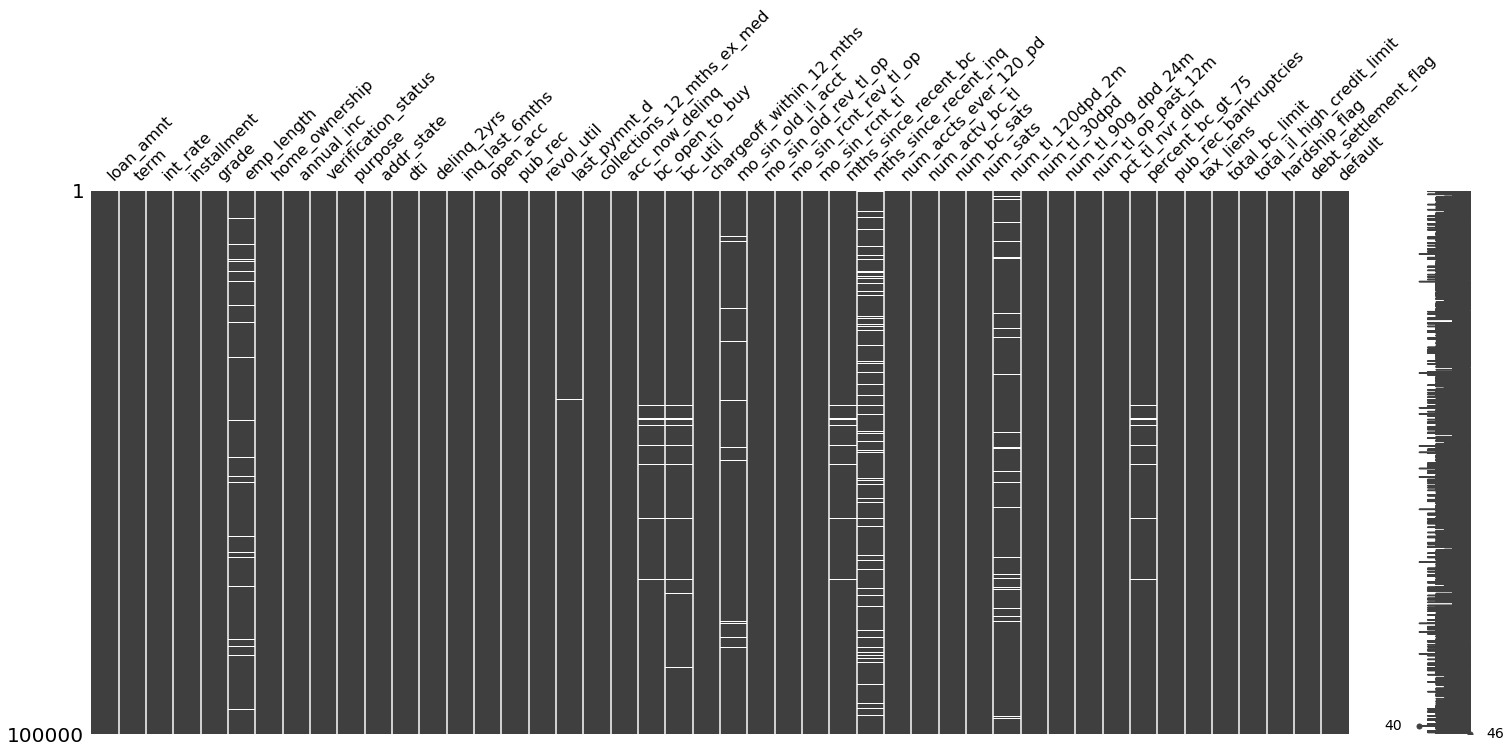

In [50]:
# 100,000
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(100000))

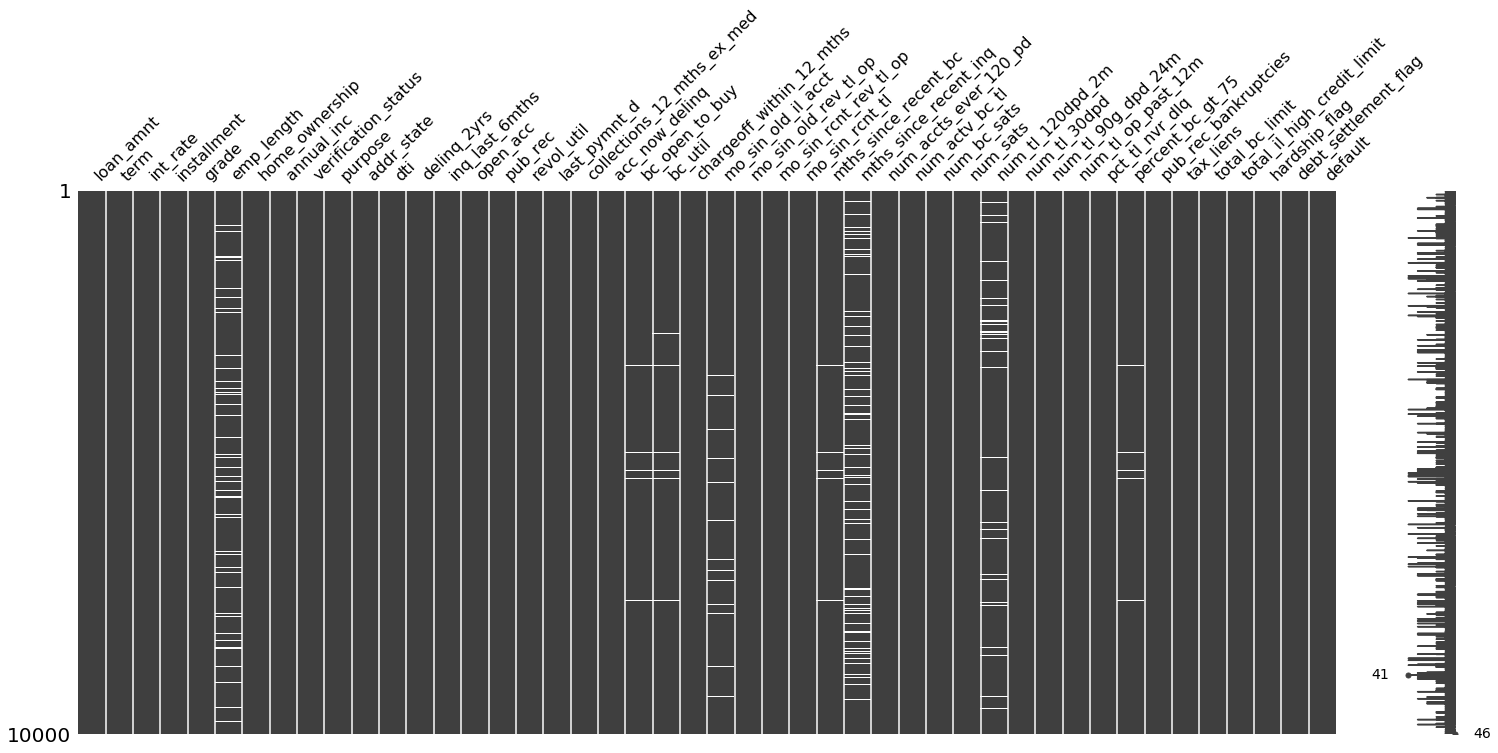

In [51]:
# 10,000
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(10000))

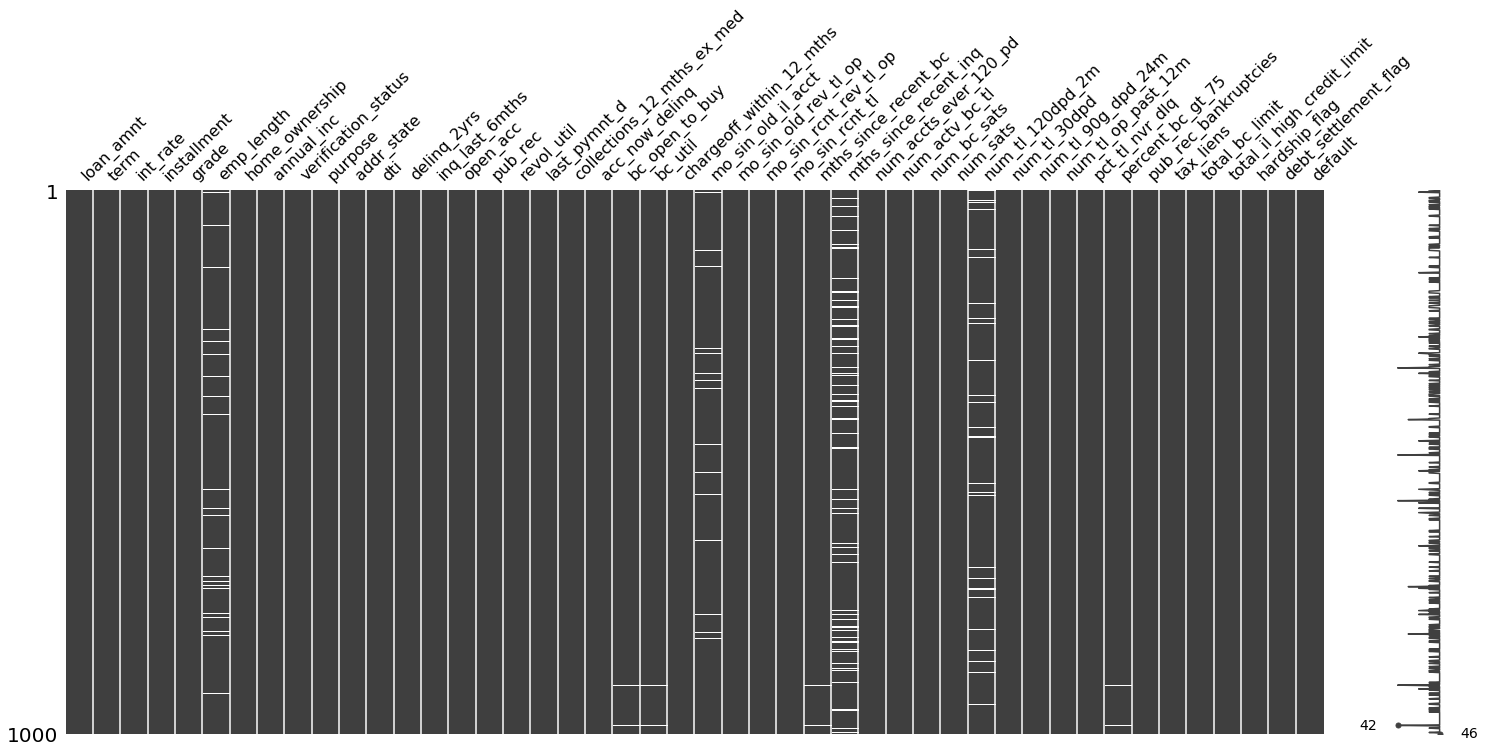

In [52]:
# 1,000
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(1000))

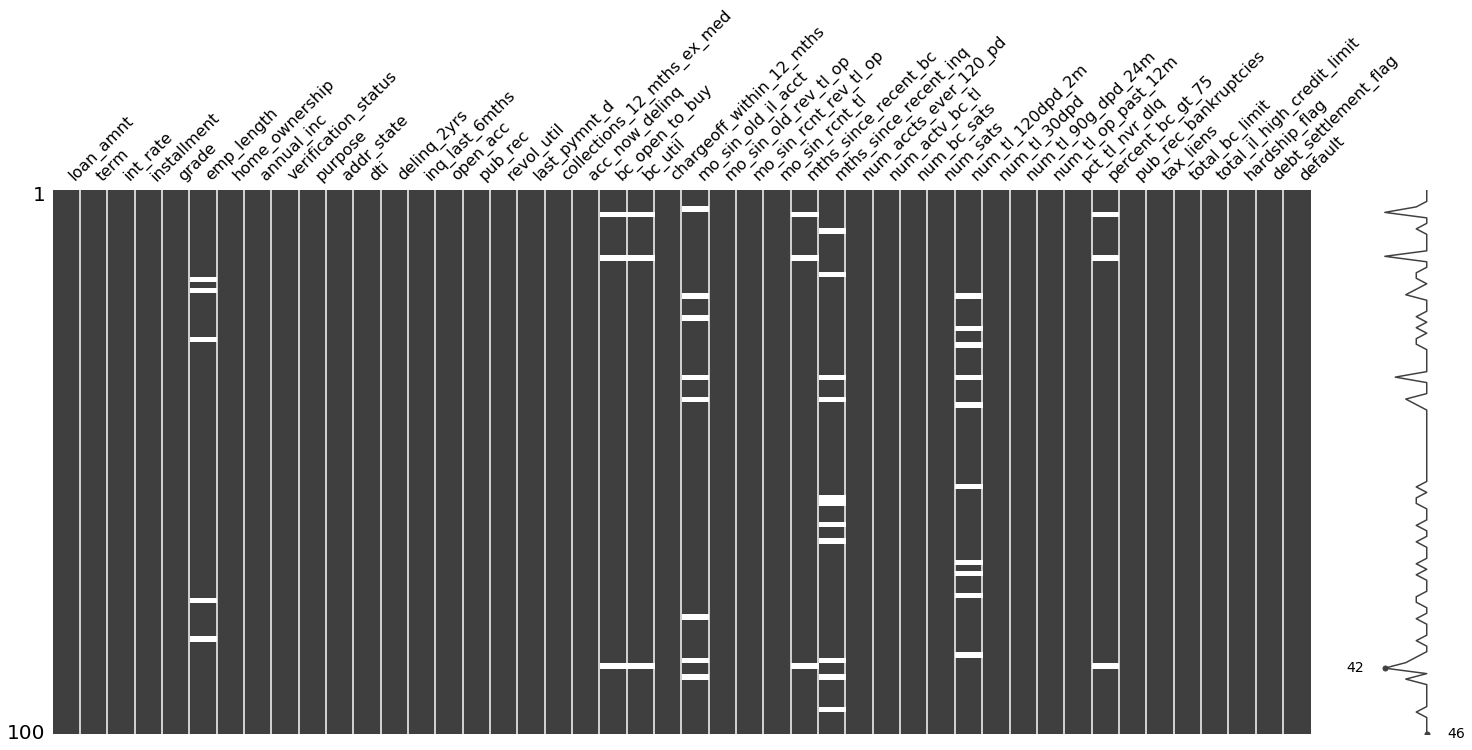

In [53]:
# 100
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(100))

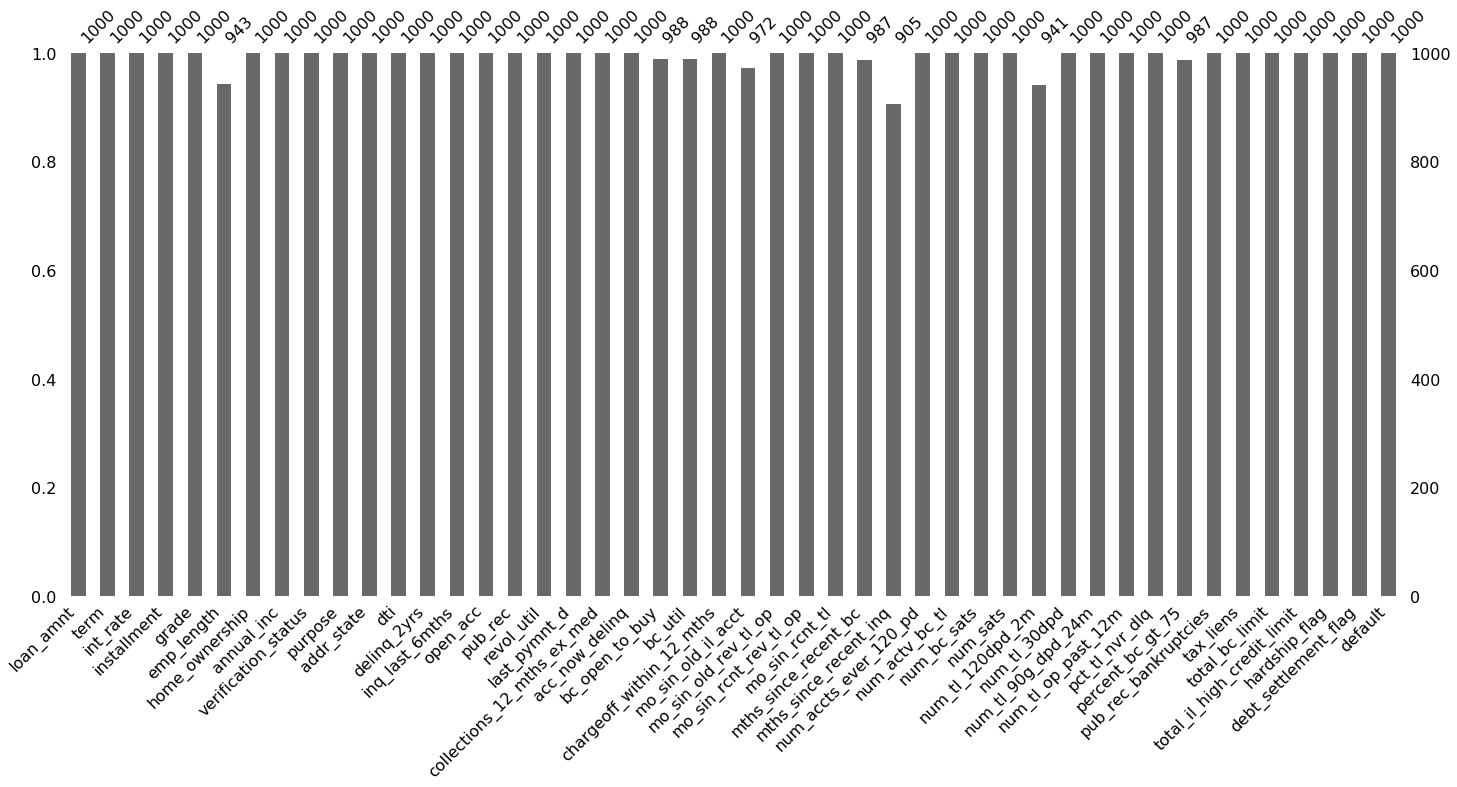

In [54]:
msno.bar(df.sample(1000))

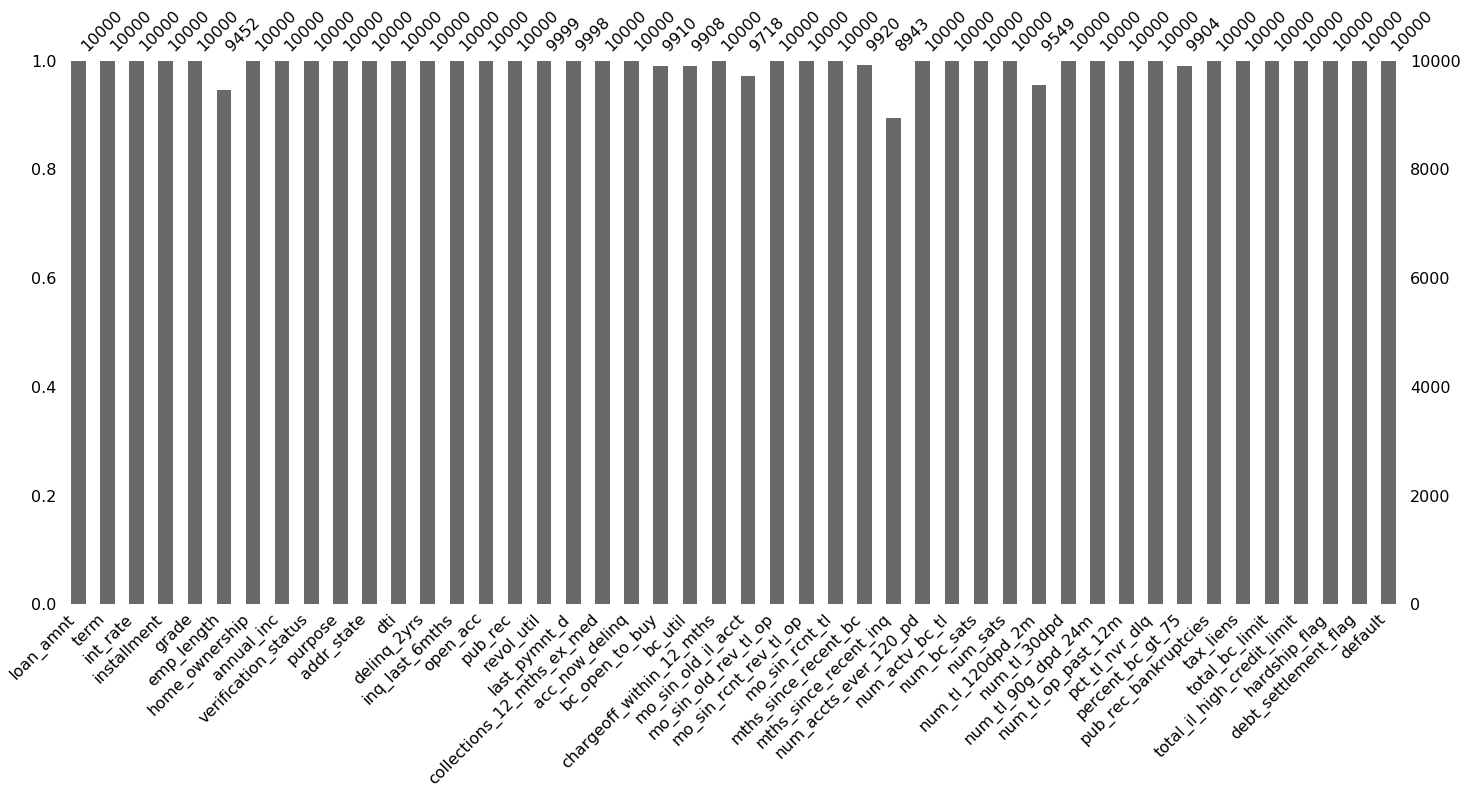

In [55]:
msno.bar(df.sample(10000))

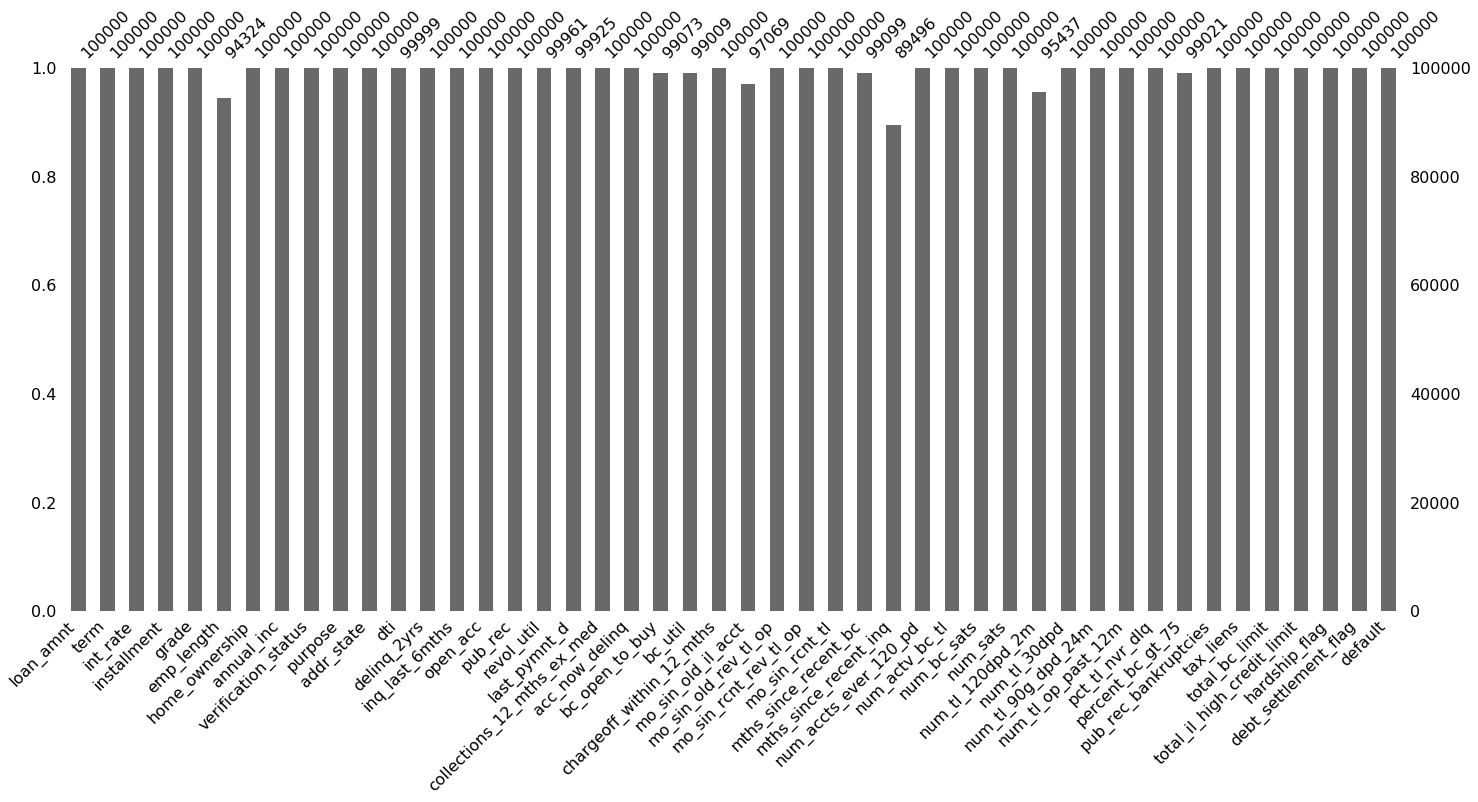

In [57]:
msno.bar(df.sample(100000))

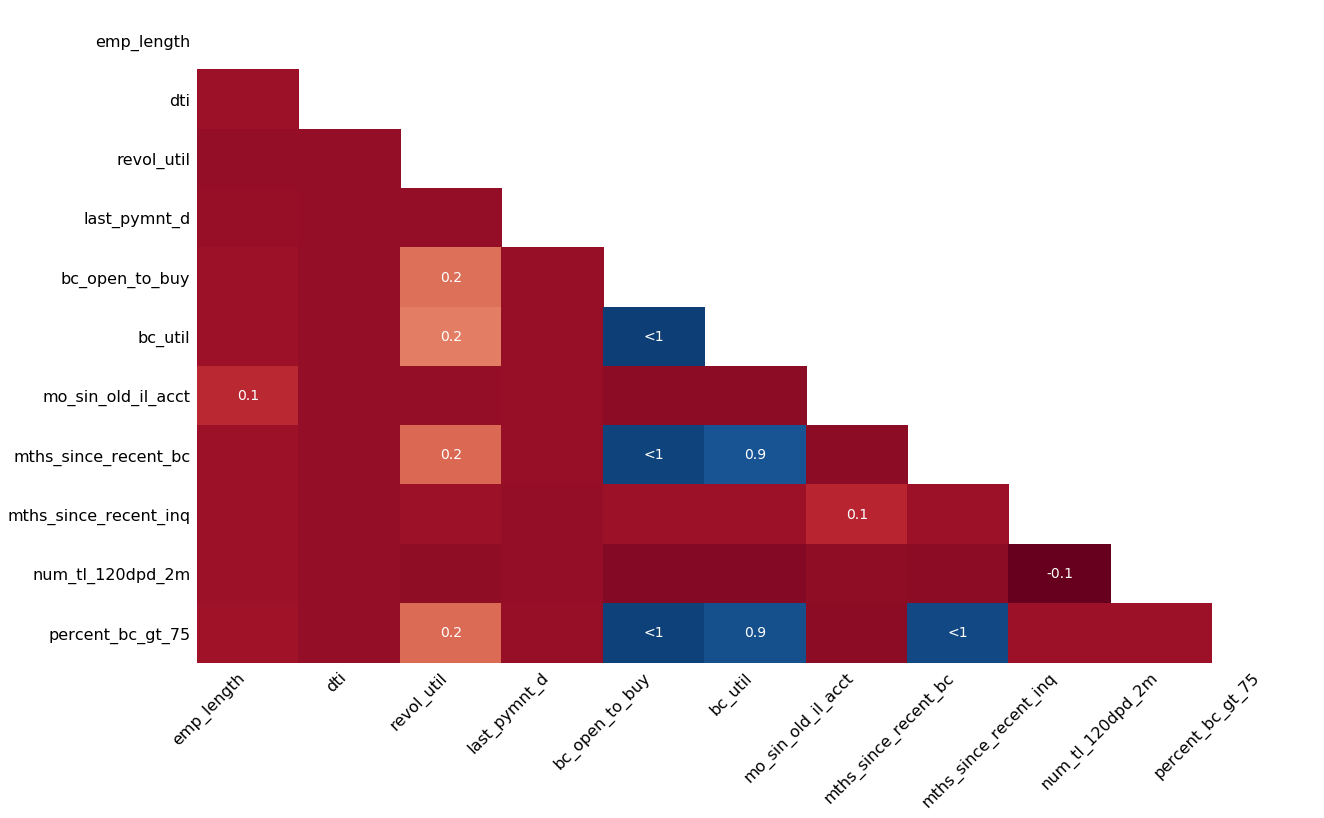

In [56]:
msno.heatmap(df)

#### Recode, clean and preprocess data for machine learning algorithm

In [175]:
df = pd.read_pickle ("C:/Users/rmbrm/Documents/DS_WP/Happy Money Assessment/data_")

In [7]:
df = pd.read_pickle ("C:/Users/rmbrm/Documents/DS_WP/Happy Money Assessment/data_")

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,last_pymnt_d,collections_12_mths_ex_med,acc_now_delinq,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,default
0,12000.0,60 months,9.80%,253.79,B,10+ years,MORTGAGE,65000.0,Not Verified,debt_consolidation,KS,23.84,0.0,0.0,18.0,0.0,13.4%,Nov-2017,0.0,0.0,41055.0,17.1,0.0,127.0,145.0,4.0,1.0,4.0,14.0,0.0,2.0,5.0,18.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,49500.0,105910.0,N,N,0
1,25000.0,36 months,5.32%,752.87,A,1 year,MORTGAGE,150000.0,Not Verified,credit_card,VT,9.54,0.0,0.0,7.0,0.0,42.5%,Mar-2018,0.0,0.0,24661.0,44.0,0.0,166.0,238.0,4.0,4.0,73.0,NaN,0.0,1.0,3.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,44000.0,51081.0,N,N,0
2,28000.0,60 months,18.49%,718.51,D,10+ years,MORTGAGE,75000.0,Verified,debt_consolidation,IN,31.88,0.0,0.0,27.0,0.0,51.9%,Mar-2018,0.0,0.0,23476.0,59.9,0.0,143.0,158.0,4.0,4.0,10.0,16.0,0.0,14.0,14.0,27.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,58500.0,31758.0,N,N,0
3,30000.0,36 months,15.77%,1051.31,D,2 years,MORTGAGE,175000.0,Not Verified,home_improvement,OH,18.50,0.0,1.0,9.0,0.0,50.3%,Dec-2016,0.0,0.0,21569.0,50.3,0.0,118.0,220.0,16.0,6.0,16.0,0.0,0.0,2.0,3.0,9.0,0.0,0.0,0.0,3.0,95.7,33.3,0.0,0.0,43400.0,146568.0,N,N,0
4,17600.0,60 months,19.89%,465.22,E,< 1 year,RENT,44000.0,Verified,credit_card,FL,17.56,0.0,0.0,7.0,0.0,102.4%,Mar-2018,0.0,0.0,0.0,102.4,0.0,112.0,114.0,25.0,13.0,25.0,NaN,0.0,3.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,12600.0,127033.0,N,N,0


In [9]:
df.emp_length = df.emp_length.replace({"10+ years": 10, "1 year": 1})

In [6]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,last_pymnt_d,collections_12_mths_ex_med,acc_now_delinq,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,default
0,12000.0,60 months,9.80%,253.79,B,10,MORTGAGE,65000.0,Not Verified,debt_consolidation,KS,23.84,0.0,0.0,18.0,0.0,13.4%,Nov-2017,0.0,0.0,41055.0,17.1,0.0,127.0,145.0,4.0,1.0,4.0,14.0,0.0,2.0,5.0,18.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,49500.0,105910.0,N,N,0
1,25000.0,36 months,5.32%,752.87,A,1,MORTGAGE,150000.0,Not Verified,credit_card,VT,9.54,0.0,0.0,7.0,0.0,42.5%,Mar-2018,0.0,0.0,24661.0,44.0,0.0,166.0,238.0,4.0,4.0,73.0,NaN,0.0,1.0,3.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,44000.0,51081.0,N,N,0
2,28000.0,60 months,18.49%,718.51,D,10,MORTGAGE,75000.0,Verified,debt_consolidation,IN,31.88,0.0,0.0,27.0,0.0,51.9%,Mar-2018,0.0,0.0,23476.0,59.9,0.0,143.0,158.0,4.0,4.0,10.0,16.0,0.0,14.0,14.0,27.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,58500.0,31758.0,N,N,0
3,30000.0,36 months,15.77%,1051.31,D,2 years,MORTGAGE,175000.0,Not Verified,home_improvement,OH,18.50,0.0,1.0,9.0,0.0,50.3%,Dec-2016,0.0,0.0,21569.0,50.3,0.0,118.0,220.0,16.0,6.0,16.0,0.0,0.0,2.0,3.0,9.0,0.0,0.0,0.0,3.0,95.7,33.3,0.0,0.0,43400.0,146568.0,N,N,0
4,17600.0,60 months,19.89%,465.22,E,< 1 year,RENT,44000.0,Verified,credit_card,FL,17.56,0.0,0.0,7.0,0.0,102.4%,Mar-2018,0.0,0.0,0.0,102.4,0.0,112.0,114.0,25.0,13.0,25.0,NaN,0.0,3.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,12600.0,127033.0,N,N,0


In [10]:
df.emp_length = df.emp_length.replace({"< 1 year": .5, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5, "6 years": 6, "7 years": 7, "8 years": 8, "9 years": 9})

In [8]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,last_pymnt_d,collections_12_mths_ex_med,acc_now_delinq,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,default
0,12000.0,60 months,9.80%,253.79,B,10.0,MORTGAGE,65000.0,Not Verified,debt_consolidation,KS,23.84,0.0,0.0,18.0,0.0,13.4%,Nov-2017,0.0,0.0,41055.0,17.1,0.0,127.0,145.0,4.0,1.0,4.0,14.0,0.0,2.0,5.0,18.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,49500.0,105910.0,N,N,0
1,25000.0,36 months,5.32%,752.87,A,1.0,MORTGAGE,150000.0,Not Verified,credit_card,VT,9.54,0.0,0.0,7.0,0.0,42.5%,Mar-2018,0.0,0.0,24661.0,44.0,0.0,166.0,238.0,4.0,4.0,73.0,NaN,0.0,1.0,3.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,44000.0,51081.0,N,N,0
2,28000.0,60 months,18.49%,718.51,D,10.0,MORTGAGE,75000.0,Verified,debt_consolidation,IN,31.88,0.0,0.0,27.0,0.0,51.9%,Mar-2018,0.0,0.0,23476.0,59.9,0.0,143.0,158.0,4.0,4.0,10.0,16.0,0.0,14.0,14.0,27.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,58500.0,31758.0,N,N,0
3,30000.0,36 months,15.77%,1051.31,D,2.0,MORTGAGE,175000.0,Not Verified,home_improvement,OH,18.50,0.0,1.0,9.0,0.0,50.3%,Dec-2016,0.0,0.0,21569.0,50.3,0.0,118.0,220.0,16.0,6.0,16.0,0.0,0.0,2.0,3.0,9.0,0.0,0.0,0.0,3.0,95.7,33.3,0.0,0.0,43400.0,146568.0,N,N,0
4,17600.0,60 months,19.89%,465.22,E,0.5,RENT,44000.0,Verified,credit_card,FL,17.56,0.0,0.0,7.0,0.0,102.4%,Mar-2018,0.0,0.0,0.0,102.4,0.0,112.0,114.0,25.0,13.0,25.0,NaN,0.0,3.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,12600.0,127033.0,N,N,0


In [16]:
df['emp_length'].value_counts()

10.0    141521
2.0      37497
0.5      34340
3.0      33430
1.0      27473
5.0      24930
4.0      24506
8.0      21560
7.0      18414
6.0      16838
9.0      16769
Name: emp_length, dtype: int64

In [15]:
df['term'].value_counts()

 36 months    283173
 60 months    137922
Name: term, dtype: int64

In [ ]:
df.head

In [17]:
drop_cols = ['term', 'addr_state', 'last_pymnt_d']

In [18]:
data_filtered = df.drop(drop_cols, axis=1)

In [20]:
data_filtered.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,collections_12_mths_ex_med,acc_now_delinq,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,default
0,12000.0,9.80%,253.79,B,10.0,MORTGAGE,65000.0,Not Verified,debt_consolidation,23.84,0.0,0.0,18.0,0.0,13.4%,0.0,0.0,41055.0,17.1,0.0,127.0,145.0,4.0,1.0,4.0,14.0,0.0,2.0,5.0,18.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,49500.0,105910.0,N,N,0
1,25000.0,5.32%,752.87,A,1.0,MORTGAGE,150000.0,Not Verified,credit_card,9.54,0.0,0.0,7.0,0.0,42.5%,0.0,0.0,24661.0,44.0,0.0,166.0,238.0,4.0,4.0,73.0,NaN,0.0,1.0,3.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,44000.0,51081.0,N,N,0
2,28000.0,18.49%,718.51,D,10.0,MORTGAGE,75000.0,Verified,debt_consolidation,31.88,0.0,0.0,27.0,0.0,51.9%,0.0,0.0,23476.0,59.9,0.0,143.0,158.0,4.0,4.0,10.0,16.0,0.0,14.0,14.0,27.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,58500.0,31758.0,N,N,0
3,30000.0,15.77%,1051.31,D,2.0,MORTGAGE,175000.0,Not Verified,home_improvement,18.50,0.0,1.0,9.0,0.0,50.3%,0.0,0.0,21569.0,50.3,0.0,118.0,220.0,16.0,6.0,16.0,0.0,0.0,2.0,3.0,9.0,0.0,0.0,0.0,3.0,95.7,33.3,0.0,0.0,43400.0,146568.0,N,N,0
4,17600.0,19.89%,465.22,E,0.5,RENT,44000.0,Verified,credit_card,17.56,0.0,0.0,7.0,0.0,102.4%,0.0,0.0,0.0,102.4,0.0,112.0,114.0,25.0,13.0,25.0,NaN,0.0,3.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,12600.0,127033.0,N,N,0


In [29]:
df['debt_settlement_flag'].value_counts()

0    413697
1      7398
Name: debt_settlement_flag, dtype: int64

In [27]:
df['hardship_flag'].value_counts()

0    420951
1       144
Name: hardship_flag, dtype: int64

In [23]:
df = data_filtered

In [30]:
df.to_pickle ("C:/Users/rmbrm/Documents/DS_WP/Happy Money Assessment/data_for_analysis", compression='infer', protocol=4)

In [26]:
df.hardship_flag = df.hardship_flag.replace({"N": 0, "Y": 1})

In [28]:
df.debt_settlement_flag = df.debt_settlement_flag.replace({"N": 0, "Y": 1})

In [34]:
cols = ['int_rate', 'revol_util']

# pass them to df.replace(), specifying each char and it's replacement:
df[cols] = df[cols].replace({'%': ''}, regex=True)

In [41]:
cols = ['int_rate', 'revol_util']

# pass them to df.replace(), specifying each char and it's replacement:
df[cols] = df[cols].replace({' ': ''}, regex=True)

In [46]:
df["revol_util"] = df.revol_util.astype(float)

In [45]:
df["int_rate"] = df.int_rate.astype(float)

In [36]:
df['grade'].value_counts()

C    120567
B    117606
A     73336
D     62654
E     34948
F      9817
G      2167
Name: grade, dtype: int64

In [37]:
df.grade = df.grade.replace({"A": 7, "B": 6, "C": 5, "D": 4, "E": 3, "F": 2, "G": 1})

In [38]:
df['grade'].value_counts()

5    120567
6    117606
7     73336
4     62654
3     34948
2      9817
1      2167
Name: grade, dtype: int64

In [48]:
print("Original features:\ n", list( df.columns), "\ n")
data_dummies = pd.get_dummies(df)
print("Features after get_dummies:\ n", list(data_dummies.columns))


Original features:\ n ['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'collections_12_mths_ex_med', 'acc_now_delinq', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_sats', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag', 'debt_settlement_flag', 'default'] \ n
Features after get_dummies:\ n ['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'collections_

In [50]:
data_dummies.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,collections_12_mths_ex_med,acc_now_delinq,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,default,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,12000.0,9.80,253.79,6,10.0,65000.0,23.84,0.0,0.0,18.0,0.0,13.4,0.0,0.0,41055.0,17.1,0.0,127.0,145.0,4.0,1.0,4.0,14.0,0.0,2.0,5.0,18.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,49500.0,105910.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,25000.0,5.32,752.87,7,1.0,150000.0,9.54,0.0,0.0,7.0,0.0,42.5,0.0,0.0,24661.0,44.0,0.0,166.0,238.0,4.0,4.0,73.0,NaN,0.0,1.0,3.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,44000.0,51081.0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,28000.0,18.49,718.51,4,10.0,75000.0,31.88,0.0,0.0,27.0,0.0,51.9,0.0,0.0,23476.0,59.9,0.0,143.0,158.0,4.0,4.0,10.0,16.0,0.0,14.0,14.0,27.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,58500.0,31758.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,30000.0,15.77,1051.31,4,2.0,175000.0,18.50,0.0,1.0,9.0,0.0,50.3,0.0,0.0,21569.0,50.3,0.0,118.0,220.0,16.0,6.0,16.0,0.0,0.0,2.0,3.0,9.0,0.0,0.0,0.0,3.0,95.7,33.3,0.0,0.0,43400.0,146568.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,17600.0,19.89,465.22,3,0.5,44000.0,17.56,0.0,0.0,7.0,0.0,102.4,0.0,0.0,0.0,102.4,0.0,112.0,114.0,25.0,13.0,25.0,NaN,0.0,3.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,12600.0,127033.0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
data_dummies.to_pickle ("C:/Users/rmbrm/Documents/DS_WP/Happy Money Assessment/data_dummies", compression='infer', protocol=4)

In [17]:
drop_cols = ['term', 'addr_state', 'last_pymnt_d']

In [18]:
data_filtered = df.drop(drop_cols, axis=1)

In [70]:
df = data_dummies

In [71]:
drop_cols = ['hardship_flag', 'debt_settlement_flag']

In [72]:
data_filtered = df.drop(drop_cols, axis=1)

In [73]:
df = data_filtered

In [74]:
df.shape

(421095, 59)

#### After data preprocessing, I decided to drop all cases for which there was missing data, considering the size of the data set.


In [75]:
df = df.dropna()

In [76]:
df.shape

(326627, 59)

In [77]:
df.to_pickle ("C:/Users/rmbrm/Documents/DS_WP/Happy Money Assessment/data_dummies_noNAN", compression='infer', protocol=4)

In [82]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('default')) #Remove default from list
df = df[cols+['default']] #Create new dataframe with columns in the order you want

In [83]:
df.dtypes

loan_amnt                              float64
int_rate                               float64
installment                            float64
grade                                    int64
emp_length                             float64
annual_inc                             float64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_util                             float64
collections_12_mths_ex_med             float64
acc_now_delinq                         float64
bc_open_to_buy                         float64
bc_util                                float64
chargeoff_within_12_mths               float64
mo_sin_old_il_acct                     float64
mo_sin_old_rev_tl_op                   float64
mo_sin_rcnt_rev_tl_op                  float64
mo_sin_rcnt_tl                         float64
mths_since_re

#### Correlations between target and features

In [84]:
df.shape

(326627, 59)

In [95]:
x = df.drop(df.columns[58], axis=1)

In [96]:
x.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,collections_12_mths_ex_med,acc_now_delinq,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,12000.0,9.80,253.79,6,10.0,65000.0,23.84,0.0,0.0,18.0,0.0,13.4,0.0,0.0,41055.0,17.1,0.0,127.0,145.0,4.0,1.0,4.0,14.0,0.0,2.0,5.0,18.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,49500.0,105910.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,28000.0,18.49,718.51,4,10.0,75000.0,31.88,0.0,0.0,27.0,0.0,51.9,0.0,0.0,23476.0,59.9,0.0,143.0,158.0,4.0,4.0,10.0,16.0,0.0,14.0,14.0,27.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,58500.0,31758.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,30000.0,15.77,1051.31,4,2.0,175000.0,18.50,0.0,1.0,9.0,0.0,50.3,0.0,0.0,21569.0,50.3,0.0,118.0,220.0,16.0,6.0,16.0,0.0,0.0,2.0,3.0,9.0,0.0,0.0,0.0,3.0,95.7,33.3,0.0,0.0,43400.0,146568.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,33600.0,10.78,1096.53,6,8.0,104000.0,14.01,0.0,2.0,14.0,0.0,51.8,0.0,0.0,8302.0,75.0,0.0,156.0,181.0,8.0,8.0,8.0,1.0,1.0,5.0,6.0,14.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,33200.0,37909.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,11550.0,16.59,284.51,4,5.0,38000.0,21.07,0.0,0.0,9.0,0.0,39.7,0.0,0.0,6924.0,43.7,0.0,39.0,59.0,5.0,5.0,5.0,0.0,0.0,3.0,5.0,9.0,0.0,0.0,0.0,2.0,100.0,60.0,0.0,0.0,12300.0,16005.0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
y = df['default']

In [98]:
y.head()

0    0
2    0
3    0
5    0
6    1
Name: default, dtype: int64

In [99]:
x.corrwith(y)

loan_amnt                              0.023364
int_rate                               0.242986
installment                            0.028451
grade                                 -0.236880
emp_length                            -0.018572
annual_inc                            -0.038854
dti                                    0.090851
delinq_2yrs                            0.011223
inq_last_6mths                         0.081654
open_acc                               0.023593
pub_rec                                0.022169
revol_util                             0.032074
collections_12_mths_ex_med             0.013283
acc_now_delinq                         0.003008
bc_open_to_buy                        -0.073843
bc_util                                0.041933
chargeoff_within_12_mths               0.004588
mo_sin_old_il_acct                    -0.032447
mo_sin_old_rev_tl_op                  -0.067884
mo_sin_rcnt_rev_tl_op                 -0.057687
mo_sin_rcnt_tl                        -0

In [ ]:
# Create arrays for machine learning

In [132]:
df.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,collections_12_mths_ex_med,acc_now_delinq,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,default
0,12000.0,9.80,253.79,6,10.0,65000.0,23.84,0.0,0.0,18.0,0.0,13.4,0.0,0.0,41055.0,17.1,0.0,127.0,145.0,4.0,1.0,4.0,14.0,0.0,2.0,5.0,18.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,49500.0,105910.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,28000.0,18.49,718.51,4,10.0,75000.0,31.88,0.0,0.0,27.0,0.0,51.9,0.0,0.0,23476.0,59.9,0.0,143.0,158.0,4.0,4.0,10.0,16.0,0.0,14.0,14.0,27.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,58500.0,31758.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,30000.0,15.77,1051.31,4,2.0,175000.0,18.50,0.0,1.0,9.0,0.0,50.3,0.0,0.0,21569.0,50.3,0.0,118.0,220.0,16.0,6.0,16.0,0.0,0.0,2.0,3.0,9.0,0.0,0.0,0.0,3.0,95.7,33.3,0.0,0.0,43400.0,146568.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,33600.0,10.78,1096.53,6,8.0,104000.0,14.01,0.0,2.0,14.0,0.0,51.8,0.0,0.0,8302.0,75.0,0.0,156.0,181.0,8.0,8.0,8.0,1.0,1.0,5.0,6.0,14.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,33200.0,37909.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,11550.0,16.59,284.51,4,5.0,38000.0,21.07,0.0,0.0,9.0,0.0,39.7,0.0,0.0,6924.0,43.7,0.0,39.0,59.0,5.0,5.0,5.0,0.0,0.0,3.0,5.0,9.0,0.0,0.0,0.0,2.0,100.0,60.0,0.0,0.0,12300.0,16005.0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [134]:
features = df.drop(df.columns[58], axis=1).values 
target = df['default'].values

In [ ]:
# X is independent variables, y is the dependent variables

In [ ]:
# no scaling needed for random forest

In [136]:
type (features), type(target)

(numpy.ndarray, numpy.ndarray)

In [135]:
print(target)

[0 0 0 ... 1 1 0]


In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit( X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score( X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.847
